<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-1/blob/master/CAP5610_HW1Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
from keras.datasets import mnist

#Load data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()




Using TensorFlow backend.


In [0]:
#Preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


#Prepare data for binary classifiers
#Have all positive examples = 1, negative examples = 0
binary_labels = []
binary_test_labels = []

#Training labels
for i in range(10):
  temp = []
  for j in range(len(train_labels_original)):
    if train_labels_original[j] == i:
      temp.append(1)
    else:
      temp.append(0)
      
  binary_labels.append(temp)
 
#Test Labels
for i in range(10):
  temp = []
  for j in range(len(test_labels_original)):
    if test_labels_original[j] == i:
      temp.append(1)
    else:
      temp.append(0)
      
  binary_test_labels.append(temp)
  




In [0]:
#Use one-hot encoding
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
#Some functions

#Sigmoid
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def activation(w, x):
  return np.dot(w,x)


#Vectorized gradient function (a-y)*X
def gradient(w, b, x, y):
  return np.dot(np.transpose(x), np.transpose(sigmoid(np.dot(x, w)+b)-y))


#Calculate vectorized loss using L2 norm of predictions-labels
def logloss(w, b, x, y):
  a = sigmoid(np.dot(x, w)+b)
  
  loss = np.multiply(-1*y, np.log(a)) - np.multiply((1-y), np.log(1-a))
  loss = np.square(np.linalg.norm(loss, ord = 2)) / len(loss)
              
  return loss

#Bias gradient for log loss: (a-y)
def bias_gradient(w, b, x, y):
  return np.transpose(sigmoid(np.dot(x, w)+b)-y)

  
  


In [0]:
import random

#Initialize weight matrix (for 10 classifiers)
weights = []
bias = []

for i in range(10):
  weights.append([])
  bias.append(random.random()-0.5)
  for j in range(784):
    weights[i].append(random.random()-0.5)
    




In [12]:
#Training

#Hyperparameters
epochs = 12
batch_size = 1000
learning_rate = 0.001

training_loss_history = []
test_loss_history = []



#Train each binary classifier
for k in range(10):
  print('training', k, 'classifier')
  batch_count = []
  test_loss = []
  training_loss = []
  
  
  #Iterate over epochs
  for i in range(epochs):
    #Iterate over mini batches
    for j in range(int(len(train_images)/batch_size)):

      #get mini batch
      data = train_images[batch_size*j:min(len(train_images), batch_size*(j+1))]
      labels = binary_labels[k][batch_size*j:min(len(train_images), batch_size*(j+1))]



      #adjust weights
      weights[k] = weights[k] - learning_rate * gradient(weights[k], bias[k], data, labels)
      bias[k] = bias[k] - learning_rate * bias_gradient(weights[k], bias[k], data, labels)


    #Calculate loss after each epoch
    training_loss.append(mse(weights[k], bias[k], train_images, binary_labels[k]))
    test_loss.append(mse(weights[k], bias[k], test_images, binary_test_labels[k]))

    batch_count.append(i)
    print("Epoch", i, 'Training loss:', training_loss[i], 'Test Loss', test_loss[i])
   
  #Add loss for each binary clasifier to history
  training_loss_history.append(training_loss)
  test_loss_history.append(test_loss)
  
  

training 0 classifier
Epoch 0 Training loss: 0.013490120589122072 Test Loss 0.01125858087909823
Epoch 1 Training loss: 0.011559597412159143 Test Loss 0.009475086094364453
Epoch 2 Training loss: 0.010738693918458893 Test Loss 0.00878515142375354
Epoch 3 Training loss: 0.010251906380621149 Test Loss 0.008407485894843593
Epoch 4 Training loss: 0.009915490667660138 Test Loss 0.008162286552430011
Epoch 5 Training loss: 0.00966176012310547 Test Loss 0.007985940275783388
Epoch 6 Training loss: 0.009459482273766775 Test Loss 0.007850195670859378
Epoch 7 Training loss: 0.009292022746760647 Test Loss 0.007740526336685434
Epoch 8 Training loss: 0.009149575411771383 Test Loss 0.007648695755916543
Epoch 9 Training loss: 0.009025905185059541 Test Loss 0.00756969873653948
Epoch 10 Training loss: 0.008916811436799378 Test Loss 0.007500327954641294
Epoch 11 Training loss: 0.008819333891376511 Test Loss 0.007438436683211367
training 1 classifier
Epoch 0 Training loss: 0.012669424806668154 Test Loss 0.01

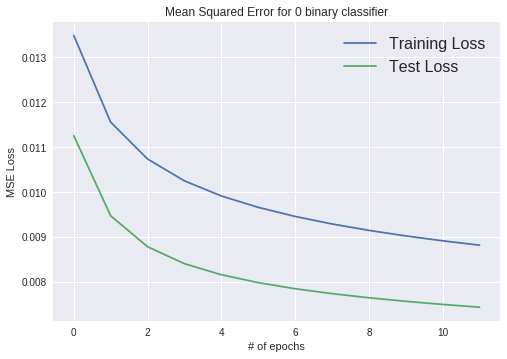

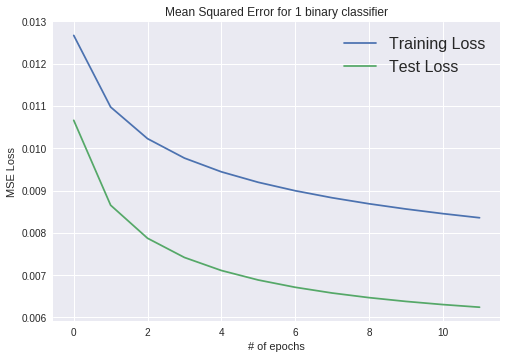

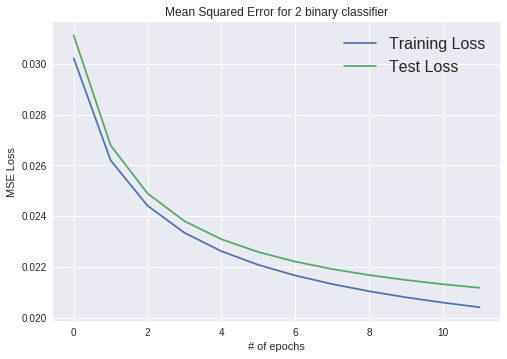

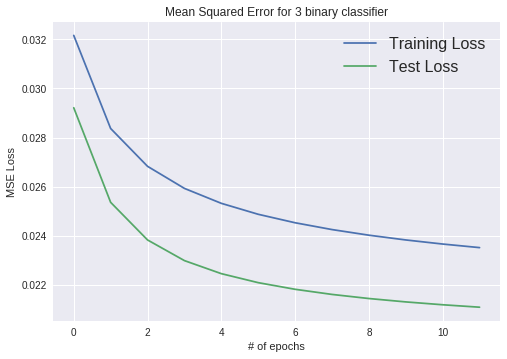

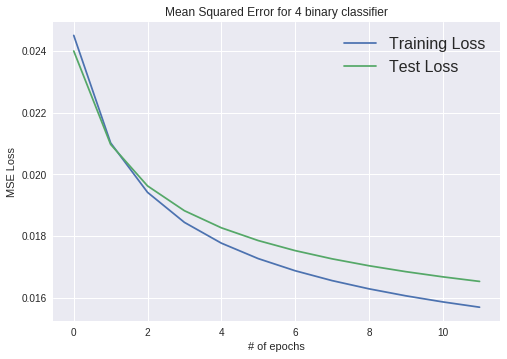

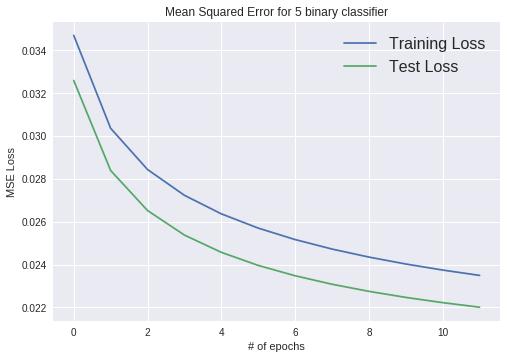

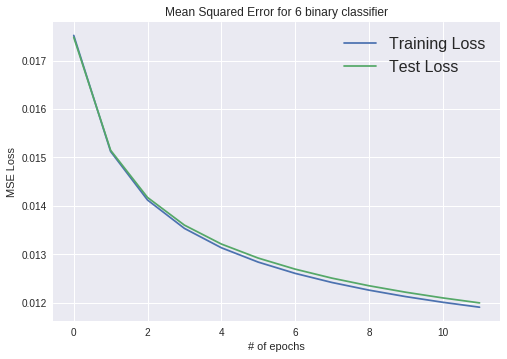

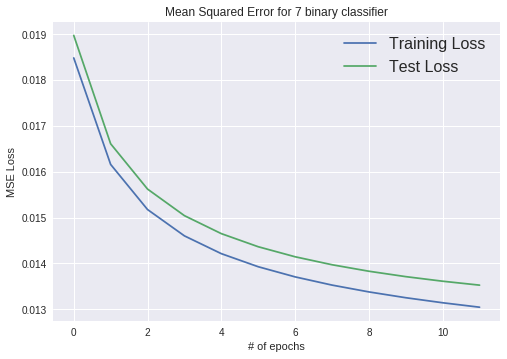

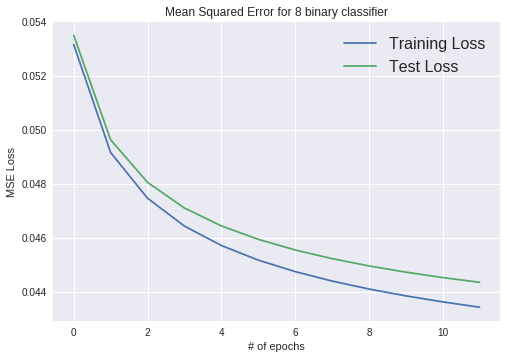

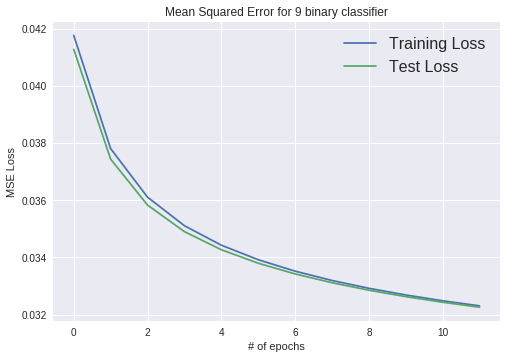

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt


for i in range(10):
  
  plt.plot(batch_count, training_loss_history[i], label = "Training Loss")
  plt.plot(batch_count, test_loss_history[i], label = "Test Loss")
  plt.legend(loc="upper right", fontsize=16)
  plt.xlabel("# of epochs")
  plt.ylabel("MSE Loss")
  plt.title("Mean Squared Error for %i binary classifier" % i)
  plt.show()
